<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reading-Data" data-toc-modified-id="Reading-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Reading Data</a></span></li><li><span><a href="#Graph" data-toc-modified-id="Graph-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Graph</a></span><ul class="toc-item"><li><span><a href="#Changing--the-label" data-toc-modified-id="Changing--the-label-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Changing  the label</a></span></li><li><span><a href="#Mean" data-toc-modified-id="Mean-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Mean</a></span><ul class="toc-item"><li><span><a href="#for-the-main-text" data-toc-modified-id="for-the-main-text-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>for the main text</a></span></li></ul></li><li><span><a href="#for-the-supplementary-material" data-toc-modified-id="for-the-supplementary-material-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>for the supplementary material</a></span></li><li><span><a href="#SE" data-toc-modified-id="SE-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>SE</a></span></li></ul></li></ul></div>

## Reading Data

In [1]:
library(reshape)
library(stringr)
library(ggplot2)
library(dplyr)


Attaching package: ‘dplyr’


The following object is masked from ‘package:reshape’:

    rename


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
df<-read.csv("Simulation3.3.csv")

In [3]:
head(df)

,Season,Strategy,Condition,Item,X1,X2,X3,X4,X5,X6,⋯,X21,X22,X23,X24,X25,X26,X27,X28,X29,X30
,<int>,<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,Directional,Asocial,M,317,320.374000,330.79700,348.151000,369.24900,393.852000,⋯,821.88200,841.83700,859.80200,875.94800,890.78700,903.7470,915.36100,925.194000,933.844000,941.349000
2,1,Directional,Asocial,SE,0,0.391441,0.55749,0.661142,0.73332,0.782062,⋯,1.22813,1.20907,1.17934,1.14799,1.10322,1.0588,1.00825,0.948556,0.888774,0.832656
3,1,Move,Asocial,M,317,320.374000,330.79700,348.151000,369.24900,393.852000,⋯,821.88200,841.83700,859.80200,875.94800,890.78700,903.7470,915.36100,925.194000,933.844000,941.349000
4,1,Move,Asocial,SE,0,0.391441,0.55749,0.661142,0.73332,0.782062,⋯,1.22813,1.20907,1.17934,1.14799,1.10322,1.0588,1.00825,0.948556,0.888774,0.832656
5,1,Mirror,Asocial,M,317,320.374000,330.79700,348.151000,369.24900,393.852000,⋯,821.88200,841.83700,859.80200,875.94800,890.78700,903.7470,915.36100,925.194000,933.844000,941.349000
6,1,Mirror,Asocial,SE,0,0.391441,0.55749,0.661142,0.73332,0.782062,⋯,1.22813,1.20907,1.17934,1.14799,1.10322,1.0588,1.00825,0.948556,0.888774,0.832656


transforming into the tidy-format

In [4]:
mdf <-melt(df, id.vars = c('Season','Strategy','Condition','Item'))
head(mdf)

,Season,Strategy,Condition,Item,variable,value
,<int>,<chr>,<chr>,<chr>,<fct>,<dbl>
1,1,Directional,Asocial,M,X1,317
2,1,Directional,Asocial,SE,X1,0
3,1,Move,Asocial,M,X1,317
4,1,Move,Asocial,SE,X1,0
5,1,Mirror,Asocial,M,X1,317
6,1,Mirror,Asocial,SE,X1,0


In [5]:
# setting Trial
as.character(mdf[,5]) %>% str_split_fixed(., pattern="X",2) -> TrialMat
as.numeric(TrialMat[,2]) -> Trial

cbind(mdf, Trial) -> mdf

In [6]:
colnames(mdf)[6]<-"Fitness"

head(mdf)

,Season,Strategy,Condition,Item,variable,Fitness,Trial
,<int>,<chr>,<chr>,<chr>,<fct>,<dbl>,<dbl>
1,1,Directional,Asocial,M,X1,317,1
2,1,Directional,Asocial,SE,X1,0,1
3,1,Move,Asocial,M,X1,317,1
4,1,Move,Asocial,SE,X1,0,1
5,1,Mirror,Asocial,M,X1,317,1
6,1,Mirror,Asocial,SE,X1,0,1


## Graph

In [7]:

CPalet<-c('#009E73','#56B4E9','#CC6677')
labeli <- as_labeller(c("1" = "Season 1",
                         "2" = "Season 2",
                         "3" = "Season 3"))

### Changing  the label

In [8]:
labeliall <- as_labeller(c("1" = "Season 1",
                         "2" = "Season 2",
                         "3" = "Season 3",
                          "Directional"="Memory Only",
                          "Move"="Fixed Stride",
                          "Mirror"="Variable Stride"))

In [9]:
mdf$Strategy<-factor(mdf$Strategy, levels =c("Directional","Move","Mirror"))

### Mean

#### for the main text

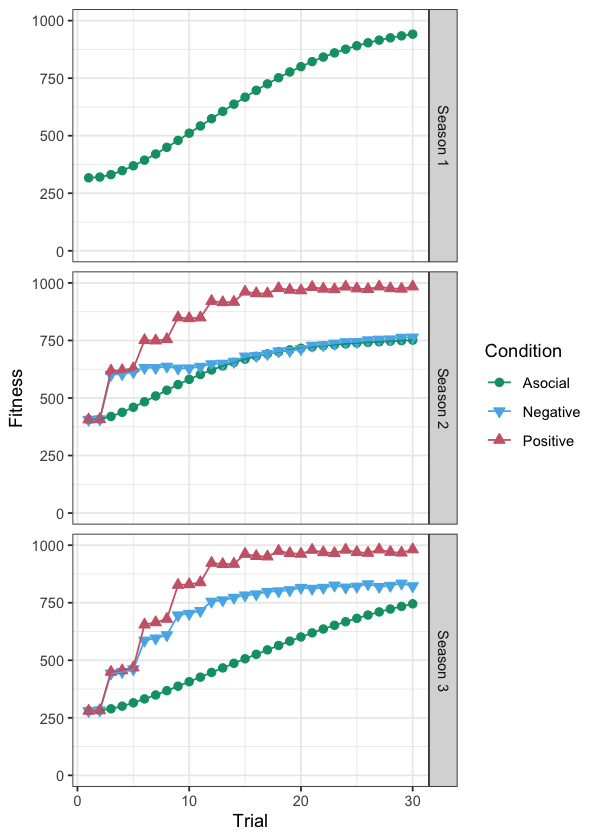

In [10]:
options(repr.plot.width=5, repr.plot.height=7)

ggplot(mdf[(mdf$Item=="M")&(mdf$Strategy=="Mirror"),], aes(x=Trial, y=Fitness, group= Condition, fill  = Condition, color = Condition,  shape = Condition)) +  
ylim(0,1000)+
geom_point(size = 2)+geom_line()+
scale_color_manual(values = CPalet, name = "Condition",labels = c("Asocial", "Negative","Positive"))+
scale_fill_manual(values = CPalet, name = "Condition",labels = c("Asocial", "Negative","Positive"))+
theme_bw()+scale_shape_manual(values = c(21,25,24))+
facet_grid(Season ~ . ,labeller = labeli)

### for the supplementary material

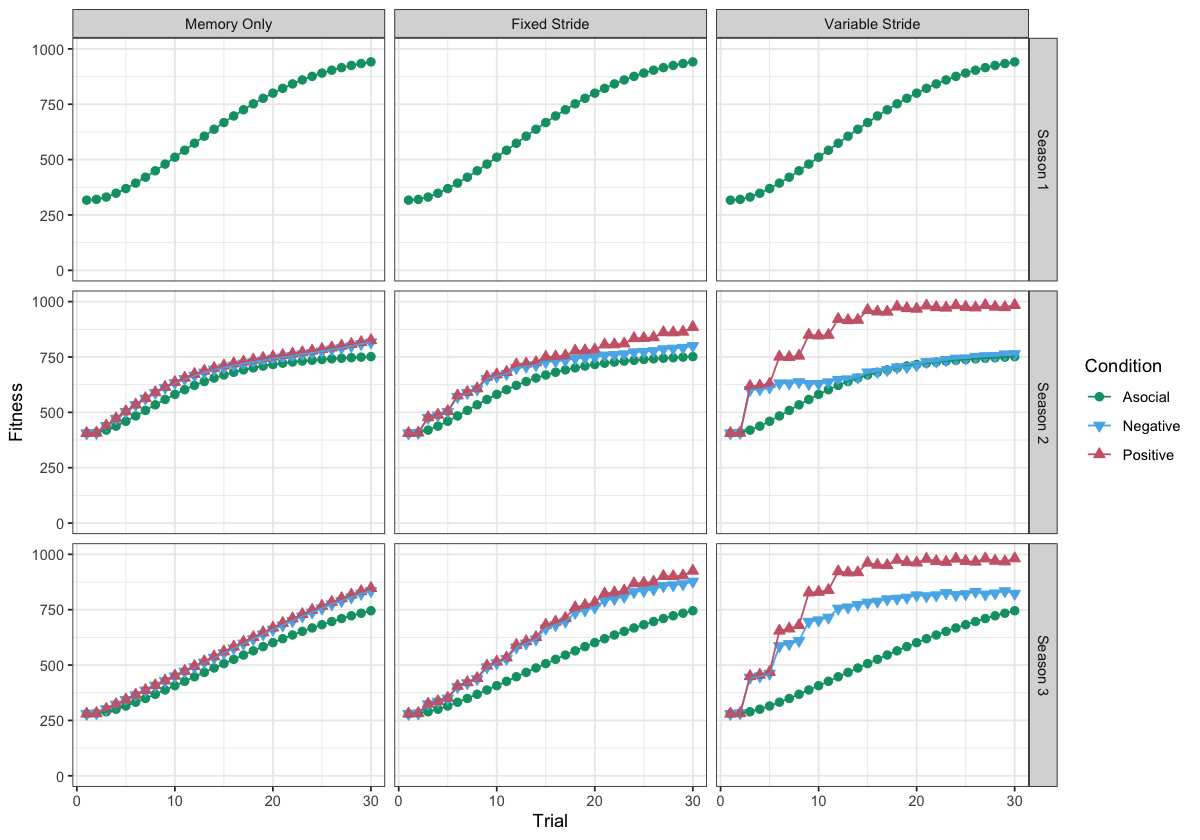

In [11]:
options(repr.plot.width=10, repr.plot.height=7)

ggplot(mdf[mdf$Item ==  "M",], aes(x=Trial, y=Fitness, group= Condition, fill  = Condition, color = Condition,  shape = Condition)) +  
ylim(0,1000)+
geom_point(size = 2)+geom_line()+
scale_color_manual(values = CPalet, name = "Condition",labels = c("Asocial", "Negative","Positive"))+
scale_fill_manual(values = CPalet, name = "Condition",labels = c("Asocial", "Negative","Positive"))+
scale_shape_manual(values = c(21,25,24), name = "Condition",labels = c("Asocial", "Negative","Positive"))+
theme_bw()+
facet_grid(Season ~ Strategy  ,labeller = labeliall)

### SE

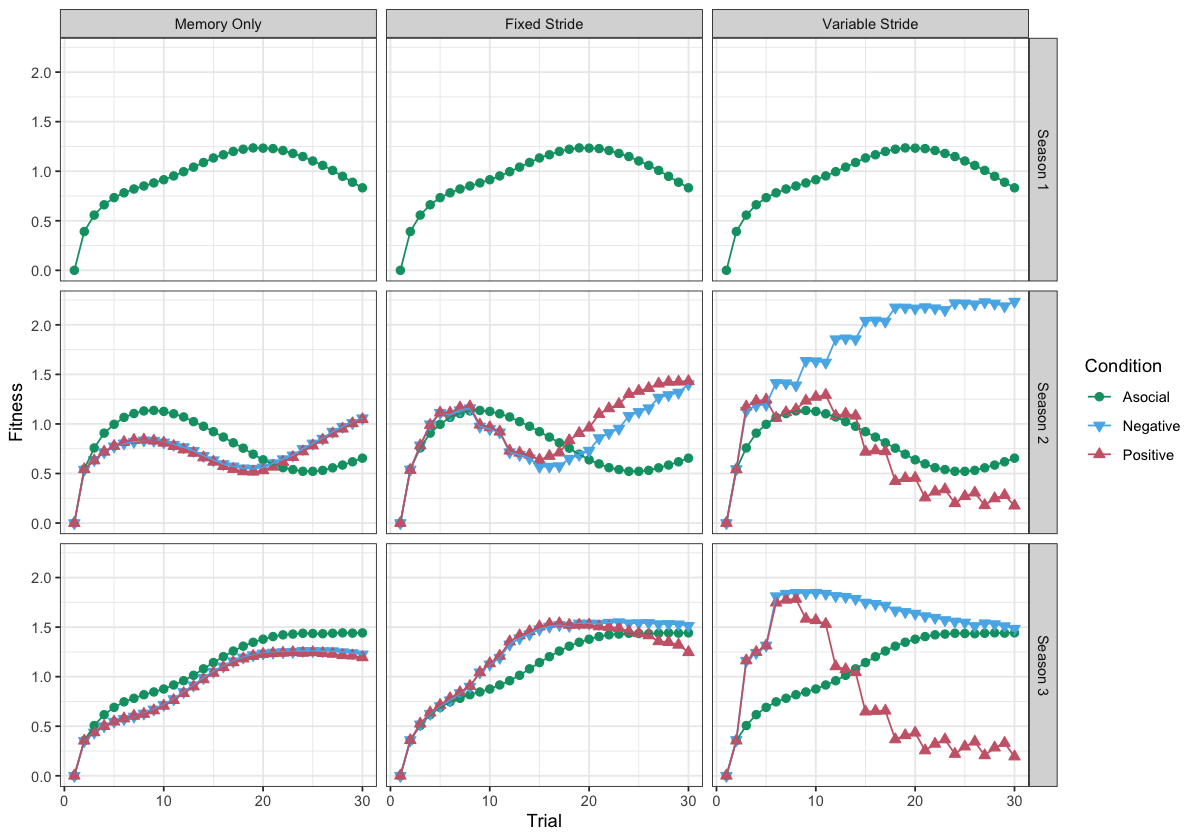

In [12]:
options(repr.plot.width=10, repr.plot.height=7)

ggplot(mdf[mdf$Item ==  "SE",], aes(x=Trial, y=Fitness, group= Condition, fill  = Condition, color = Condition,  shape = Condition)) +  
geom_point(size = 2)+geom_line()+
scale_color_manual(values = CPalet, name = "Condition",labels = c("Asocial", "Negative","Positive"))+
scale_fill_manual(values = CPalet, name = "Condition",labels = c("Asocial", "Negative","Positive"))+
scale_shape_manual(values = c(21,25,24), name = "Condition",labels = c("Asocial", "Negative","Positive"))+
theme_bw()+
facet_grid(Season ~ Strategy  ,labeller =labeliall )